<a href="https://colab.research.google.com/github/Aakriti555/Neural-Network-and-Deep-learning-Assignment-/blob/main/Practical_Assignment_VII_Aakriti_Banjara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aakriti Banjara
# CE 2020

Chapter VII - Hands-On Deep Learning Algorithms with Python: Master Deep Learning Algorithms with Extensive Math by Implementing them Using TensorFlow by Sudharsan Ravichandiran. Packt Publishing, 2019.

Go through the content of each of the sections below. Type in the available codes under each section and produce the expected outputs by running the codes.
- Learning Text Representations
- The Word2vec model
- Building a Word2vec model using
genism
- Visualizing word embeddings in
TensorBoard


# Learning Text Representations
 Neural networks require inputs only in numbers. So when we have textual
 data, we convert them into numeric or vector representation and feed it to the
 network. There are various methods for converting the input text to numeric
 form. Some of the popular methods include **term frequency-inverse
 document frequency (tf-idf), bag of words (BOW)**, and so on. However,
 these methods do not capture the semantics of the word. This means that these
 methods will not understand the meaning of the words.
  In this chapter, we will understand the following topics:
 - The word2vec model
 - Building a word2vec model using gensim
 - Visualizing word embeddings in TensorBoard
 - Doc2vec model
 - Finding similar documents using doc2vec
 - Skip-thoughts
 - Quick-thoughts


# Understanding the word2vec model
Word2vec is one of the most popular and widely used models for generating the word embeddings.  The embedding
 generated by the word2vec model captures the syntactic and semantic
 meanings of a word.

For instance, let's consider the following text: ***Archie used to live in New
 York, he then moved to Santa Clara. He loves apples and strawberries.***

As you can
 see in the following figure, words *apples* and *strawberries* are plotted close
 together, and *New York* and *Santa Clara* are plotted close together. They are
 plotted close together because the word2vec model has learned that *apples*
 and *strawberries* are similar entities that is, fruits and *New York* and *Santa
 Clara* are similar entities, that is cities, and so their vectors (embeddings) are
 similar to each other, and which is why the distance between them is less:


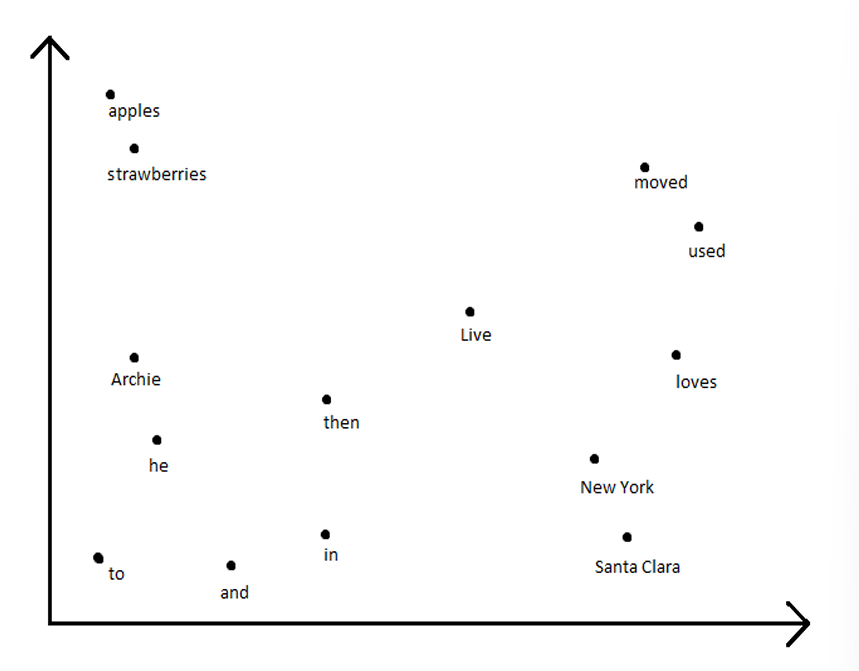

Thus, with word2vec model, we can learn the meaningful vector
 representation of a word which helps the neural networks to understand what
 the word is about.

 There are
 two types of word2vec models for learning the embeddings of a word:

1. CBOW model
2. Skip-gram model

# Understanding the CBOW model

Let's consider the sentence, *The Sun rises in the east* with the word *rises* as
 the target word. If we set the window size as 2, then we take the words the
 and *sun*, which are the two words before, and in and the which are the two
 words after the target word rises as context words, as shown in the following
 figure:

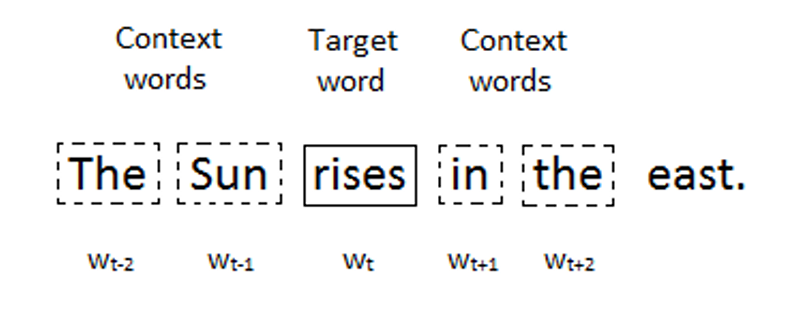

 We convert all the words in the given sentence into a
 numeric form using the one-hot encoding technique, as shown in the following
 figure:
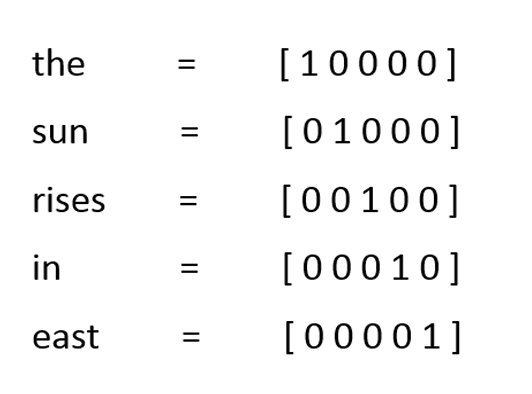

The architecture of the CBOW model is shown in the following figure. As you
 can see, we feed the context words, the, sun, in, and the, as inputs to the
 network and it predicts the target word rises as an output:

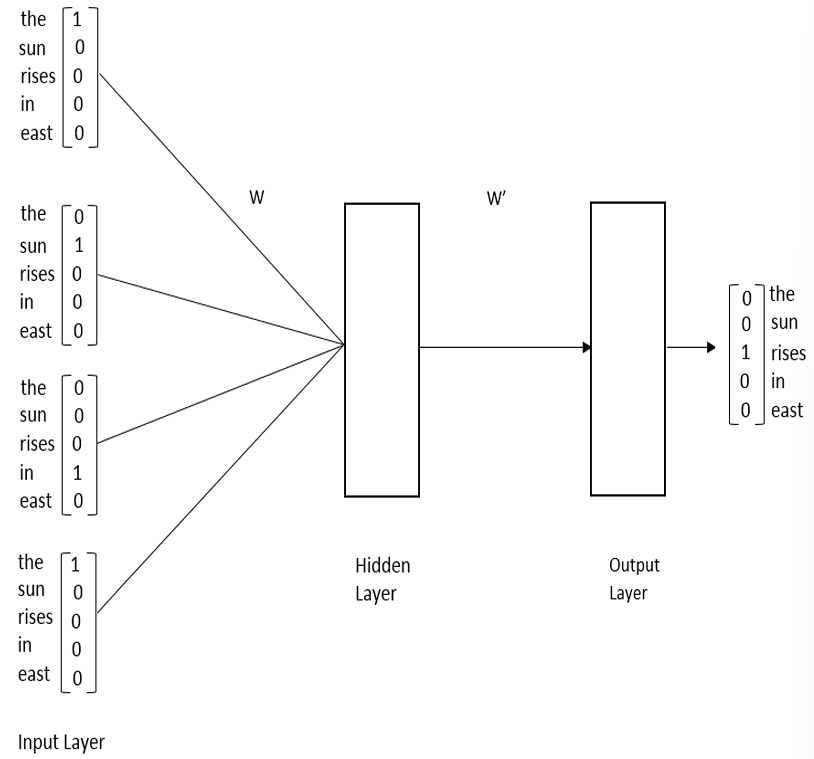

In the initial iteration, the network cannot predict the target word correctly.
 But over a series of iterations, it learns to predict the correct target word
 using gradient descent. With gradient descent, we update the weights of the
 network and find the optimal weights with which we can predict the correct
 target word.

 As we have one input, one hidden, and one output layer, as shown in the
 preceding figure, we will have two weights:

 - Input layer to hidden layer weight, **W**
 - Hidden layer to output layer weight, **W'**

  After training, if we look at the **W** matrix, it represents the embeddings for
 each of the words. So, the embedding for the word sun is [0.0, 0.3,0.3,0.6,0.1
 ]:


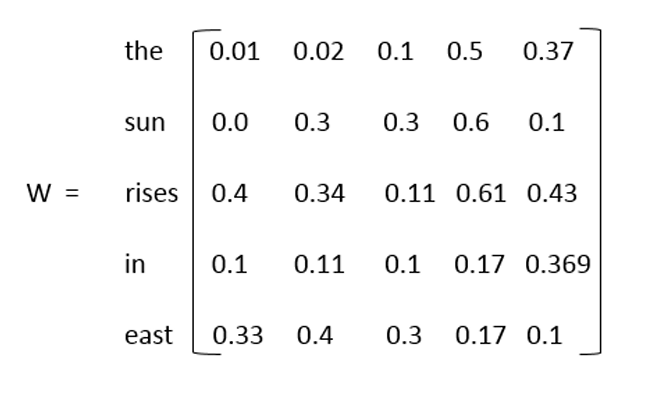

Thus, the CBOW model learns to predict the target word with the given
 context words. It learns to predict the correct target word using gradient
 descent. During training, it updates the weights of the network through
 gradient descent and finds the optimal weights with which we can predict the
 correct target word.

# CBOW with a single context word

In CBOW model with a single context
 word, we will have only one context word, that is, **C = 1** . So, the network
 takes only one context word as an input and returns one target word as an
 output.

 Before going ahead, first, let's familiarize ourselves with the notations. All the
 unique words we have in our corpus is called the vocabulary. Considering
 the example we saw in the Understanding the CBOW model section, we have
 five unique words in the sentence—*the, sun, rises, in, and east*. These five
 words are our vocabulary.

Let **U** denote the size of the vocabulary (that is, number of words) and **N**
denotes the number of neurons in the hidden layer. We learned that we have
 one input, one hidden, and one output layer:

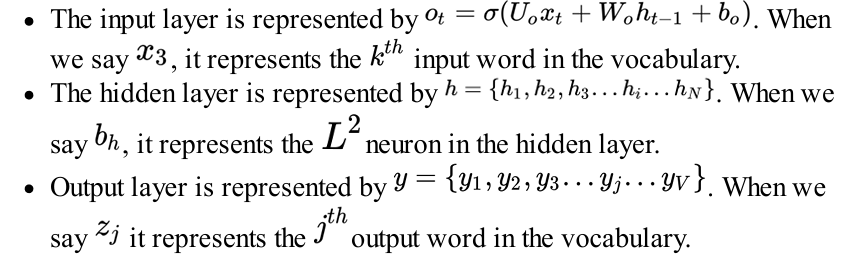

 The following figure will help us to attain clarity on the notations:

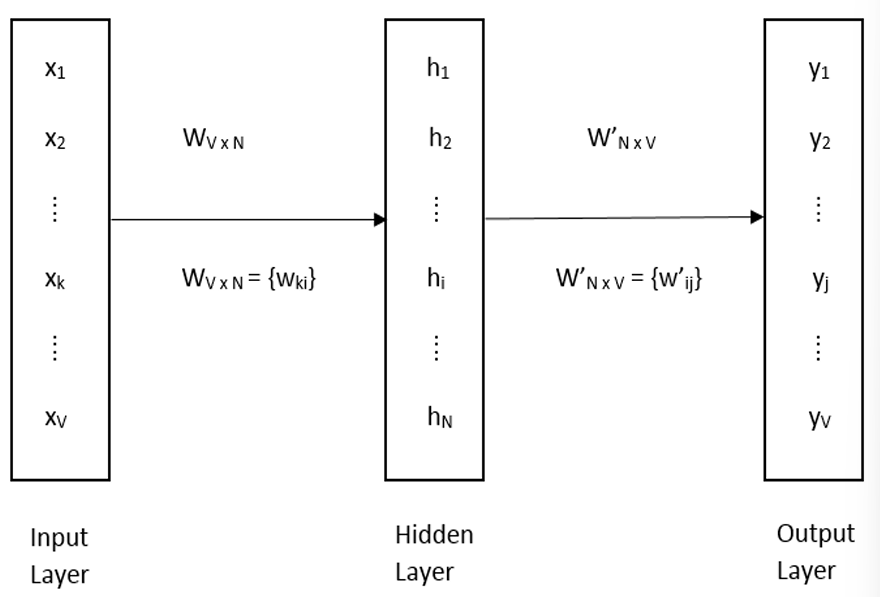

# Forward propagation

In order to predict target words given a context word, we need to perform
forward propagation.

First, we multiply the input $z_j$ with the input to hidden layer weight $W$:
$$ h = XW^T$$

We know each of the input words is one-hot encoded, so when we multiply
with , we basically obtain the $k^{th}$ row of  to . So, we can directly
 write as follows:
$$h = W_{(k,.)}$$

$W_{(k,.)}$ basically implies the vector representation of the input word. Let's
 denote the vector representation for the input word $w_1$ by $Z_{wI}$. So, the
 previous equation can be written as follows:


$$\theta = \alpha.∇ \theta J(\theta)$$
 Now we are in the hidden layer $h$ and we have another set of weight, which is
 hidden to output layer weight,$W'$ . We know that we have $U$ number of words
 in our vocabulary and we need to compute the probability for each of the
 words in our vocabulary to be the target word.

 Let $x_j$  denote the score for the $j^{th}$ word in our vocabulary to be a target word.
 The score $x_j$ is computed by multiplying the value of hidden layer $h$ and the
 hidden to output layer weight $W'$. Since we are calculating the score for a
 word $j$, we multiply the hidden layer $h$ with the $j^{th}$ column of the matrix, $W'_{ij}$.

 $$ u_j = W'^T_{ij} . h$$

 The $j^{th}$ column of the weight matrix $u_j = W'^T_{ij}$ basically denotes the vector
 representation of the word $j$. Let's denote the vector representation of the
word $j^{th}$ by ${Z'_w}^T_j$. So, the preceding equation can be written as follows:

$$ u_j ={Z'_w}^T_j.h   \cdots (2)$$
Substituting equation (1) in equation (2), we can write the following:
$$ u_j ={Z'_w}^T_j.Z_{wi}$$

We can write our output as follows:
$$y_j = \frac{exp(u_j)}{\sum_{j' = 1}^{V} exp(u'_j)} .....(3)$$

Here, $z_j$ tells us the probability for a word $j$ to the target word given an input
 context word. We compute the probability for all the words in our vocabulary
 and select the word that has a high probability as the target word.

  Our goal is to find the correct target word. Let $y^*_j$ denote the probability of the
 correct target word. So, we need to maximize this probability:
 $$max(y^*_j)$$
  Instead of maximizing the raw probabilities, we maximize the log
 probabilities:
  $$max ( log(y_j)^*)$$



Now we have a maximization objective, we need to convert this to a
 minimization objective so that we can apply our favorite gradient descent
 algorithm for minimizing the objective function. How can we change our
 maximization objective to the minimization objective? We can do that by
 simply adding the negative sign. So our objective function becomes the
 following:
 $$min -log(y_j*)$$
  The loss function can be given as follows:
$$L =  -log(y_j*)....(4)$$
Substituting equation (3) in equation (4), we get the following:
$$L = -log(\frac{exp(u_j*)}{\sum_{j' = 1}^{V} exp(u'_j)})$$
According to the logarithm quotient rule, *log(a/b) = log(a) - log(b)*, we can
 rewrite the previous equation as follows:

$$L = -(log(exp u_{j*}) - log(\sum_{j' = 1}^{V} exp(u'_j))$$
$$ = -log(exp u_{j*}) + log(\sum_{j' = 1}^{V} exp(u'_j))$$

 We know that *log* and *exp* cancel each other, so we can cancel the *log* and *exp*
 in the first term and our final loss function becomes the following:
$$L = -u_{j*} + log(\sum_{j' = 1}^{V} exp(u'_j))$$



# Backward propagation
We minimize the loss function using the gradient descent algorithm. So, we
 backpropagate the network, calculate the gradient of the loss function with
 respect to weights, and update the weights. We have two sets of weights, input
 to hidden layer weight  and hidden to output layer weights . We
 calculate gradients of loss with respect to both of these weights and update
 them according to the weight update rule:

 $$W = W - α\frac{δJ}{δW}$$
 $$W' = W' - α\frac{δJ}{δW'}$$

 In order to better understand the backpropagation, let's recollect the steps
 involved in the forward propagation:
$$h = XW^T$$
$$ u_j = W'^T_{ij} . h$$
$$L = -u_{j*} + log(\sum_{j' = 1}^{V} exp(u'_j))$$

 First, we compute the gradients of loss with respect to the hidden to output
 layer $W'$. We cannot calculate the gradient of loss $L$  with respect to $W'$
directly from $L$, as there is no $W'$ term in the loss function $L$, so we apply the
 chain rule as follows:
 $$\frac{δL}{δW'_{ij}} = \frac{δL}{δu_{j}}.\frac{δu_{j}}{δW'_{ij}} $$



 The derivative of the first term is as follows:
  $$\frac{δJ}{δW_{hy}} = \frac{δJ}{δŷ}.\frac{dz_2}{dW_{hy}}....(1)$$
   Here, $z_j$ is the error term, which is the difference between the actual word
 and predicted word.
  Now, we will calculate the derivative of the second term.
  Since we know $ u_j = W'^T_{ij} . h$:

  $$\frac{δu_{j}}{δW'_{ij}} = h$$
 Thus, the gradient of loss $L$ with respect to $W'$ is given as:
$$\frac{δL}{δW'_{ij}} = e_j. h$$


 Now, we compute the gradient with respect to the input to hidden layer weight $W$
 . We cannot calculate the derivative directly from $L$, as there is no $W$ term
 in $L$, so we apply the chain rule as follows:
   $$\frac{δL}{δW_{ki}} = \frac{δL}{δh_i}.\frac{δh_i}{δW_{ki}}$$

 In order to compute the derivative of the first term in the preceding equation,
 we again apply the chain rule, as we cannot compute the derivative of $L$ with
 respect to $b_h$ directly from $L$:
$$\frac{δL}{δh_{i}} =\sum_{j = 1}^{V} \frac{δL}{δu_j}.\frac{δu_j}{δh_{i}}$$

From equation (5), we can write:

$$\frac{δL}{δh_{i}} =\sum_{j = 1}^{V} e_j.\frac{δu_j}{δh_{i}}$$

Since we know $u_j = W'^T_{ij} . h$

$$\frac{δL}{δh_{i}} =\sum_{j = 1}^{V} e_j.W'^T_{ij}$$
Instead of having the sum, we can write:
$$\frac{δL}{δh_{i}} =LH^T$$

$LH^T$denotes the sum of the output vector of all words in the vocabulary,
 weighted by their prediction error.

Let's now calculate the derivative of the second term.

 Since we know, $h = XW^T$:

 $$\frac{δh_i}{δW_{ki}} =X$$

 Thus, the gradient of loss $L$ with respect to $W$ is given as:
  $$\frac{δh_i}{δW_{ki}} =LH^T.X$$

  We update the weights of our network using the preceding equation and obtain
 an optimal weights during training. The optimal input to hidden layer weight,
, $W$ becomes the vector representation for the words in our vocabulary.

In [ ]:
#  The Python code for Single_context_CBOW is as follows:

 def Single_context_CBOW(x, label, W1, W2, loss):
    #forward propagation
    h = np.dot(W1.T, x)
    u = np.dot(W2.T, h)
    y_pred = softmax(u)
    #error
    e = -label + y_pred
    #backward propagation
    dW2 = np.outer(h, e)
    dW1 = np.outer(x, np.dot(W2.T, e))
    #update weights
    W1 = W1 - lr * dW1
    W2 = W2 - lr * dW2
    #loss function
    loss += -float(u[label == 1]) + np.log(np.sum(np.exp(u)))
    return W1, W2, loss


IndentationError: unexpected indent (<ipython-input-1-7bd221deb9cc>, line 3)

# CBOW with multiple context words
 Now that we understood how the CBOW model works with a single word as
 a context, we will see how it will work when you have multiple words as
 context words. The architecture of CBOW with multiple input words as a
 context is shown in the following figure:

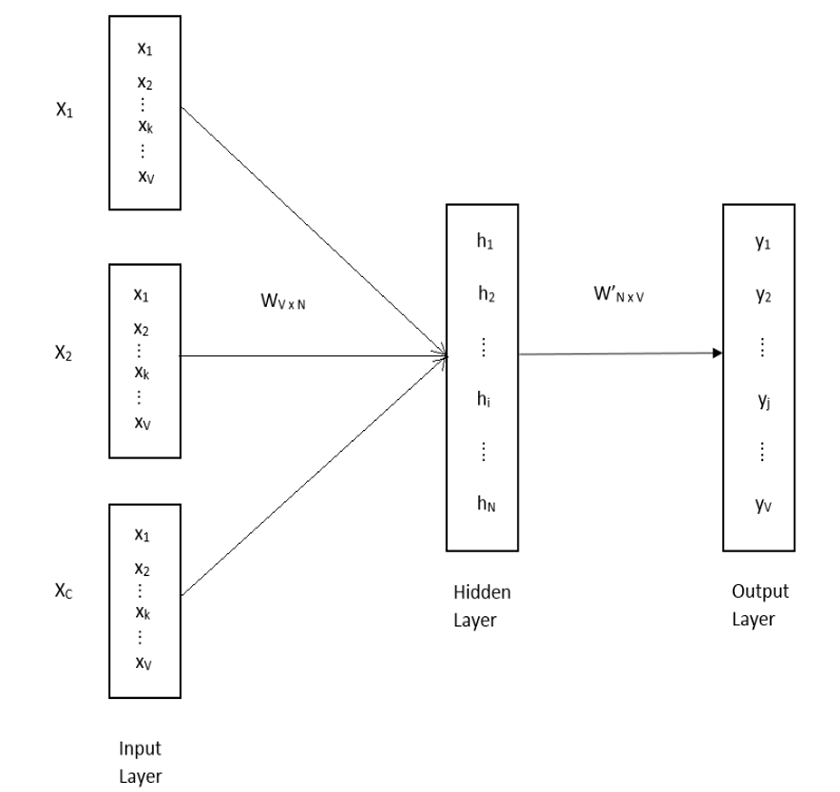

There is not much difference between the multiple words as a context and a
 single word as a context. The difference is that, with multiple contexts words
 as inputs, we take the average of all the input context words. That is, as a first
 step, we forward propagate the network and compute the value of $h$ by
 multiplying input $z_j$ and weights $W$, as we saw in the CBOW with a single
 context word section:
 $$h = XW^T$$
 But, here, since we have multiple context words, we will have multiple inputs
 (that is $X_1,X_2,⋯X_C$), where $U$ is the number of context words, and we
 simply take the average of them and multiply with the weight matrix, shown as
 follows:

 $$h = \frac{(X_1,X_2,⋯X_C)}{C}W^T$$
 $$ h = \frac{1}{C}(X_1W^T,X_2W^T,⋯X_CW^T)$$

 Similar to what we learned in the CBOW with single context word section, $X_1W^T$
 represents the vector representation of the input context word $w_1$.
We can
 rewrite the preceding equation as:
  $$ h = \frac{1}{C}(Z_{w1},Z_{w2},⋯Z_{wc}^T).....(6)$$

   Here, $U$ represents the number of context words.

   Computing the value of $x_j$ is the same as we saw in the previous section:

  $$u_j = Z'_{w^T_j}.h .....(5)$$
  Here, $Z'_{w^T_j}$ denotes the vector representation of the $j^{th}$ word in the
 vocabulary.

  Substituting equation (6) in equation (7), we write the following:
  $$ u_j = Z'_{w^T_j}.\frac{1}{C}(Z_{w1},Z_{w2},⋯Z_{w_c}^T)$$
   The preceding equation gives us the similarity between the $j^{th}$ word in the
 vocabulary and the average representations of given input context words.
 \
  The loss function is the same as we saw in the single word context and it is
 given as:
$$L = -u_{j*} + log(\sum_{j' = 1}^{V} exp(u'_j))$$

Now, there is a small difference in backpropagation. We know that in
 backpropagation we compute gradients and update our weights according to
 the weight update rule. Recall that, in the previous section, this is how we
 update the weights:

 $$W = W - αLH^T.X$$
 $$W' = W' - αe_j.h$$

  Since, here, we have multiple context words as an input, we take an average
 of context words while computing $W$:
 $$W = W - \alpha LH^T.\frac{(X_1,X_2,⋯X_C)}{C}$$

 Computing $W'$ is the same as we saw in the previous section:
  $$W' = W' - αe_j.h$$
  So, in a nutshell, in the multi-word context, we just take the average of
 multiple context input words and build the model as we did in the single word
 context of CBOW.

# Understanding skip-gram model
Skip-gram is just the reverse of the CBOW model,. That is in a
 skip-gram model, we try to predict the context words given the target word as
 an input. As shown in the following figure, we can notice that we have the
 target word as rises and we need to predict the context words the, sun, in,
 and the:

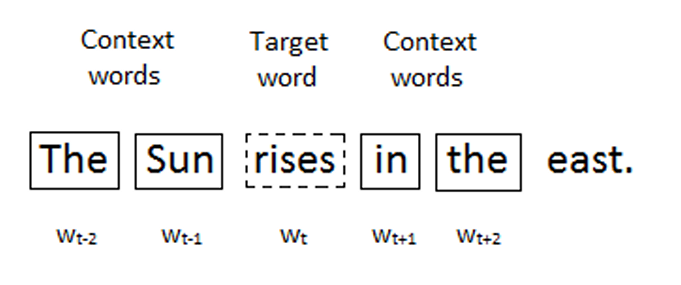

Similar to the CBOW model, we use the window size to determine how many
 context words we need to predict. The architecture of the skip-gram model is
 shown in the following figure.
 As we can see that it takes the single target word as input and tries to predict
 the multiple context words:
 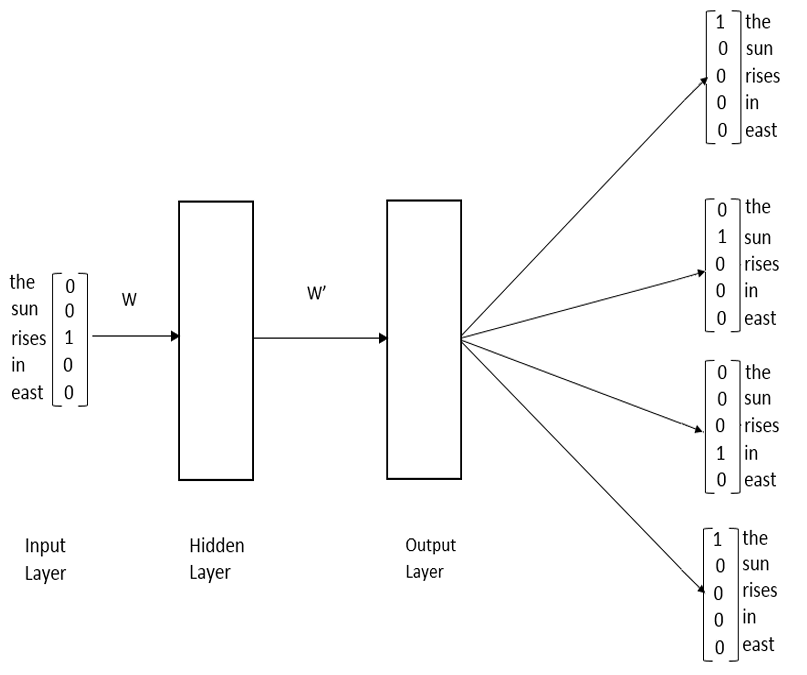

In the skip-gram model, we try to predict the context words based on the
 target word. So, it takes one target word as an input and returns $U$ context
 words as output, as shown in the above figure. So, after training the skip-gram
 model to predict the context words, the weights between our input to hidden
 layer $W$ becomes the vector representation of the words, just like we saw in
 the CBOW model.

# Forward propagation in skip-gram
 First, we will understand how forward propagation works in the skip-gram
 model. Let's use the same notations we used in the CBOW model. The
 architecture of the skip-gram model is shown in the following figure. As you
 can see, we feed only one target word $z_j$ as an input and it returns the $U$
context words as an output $Y$ :

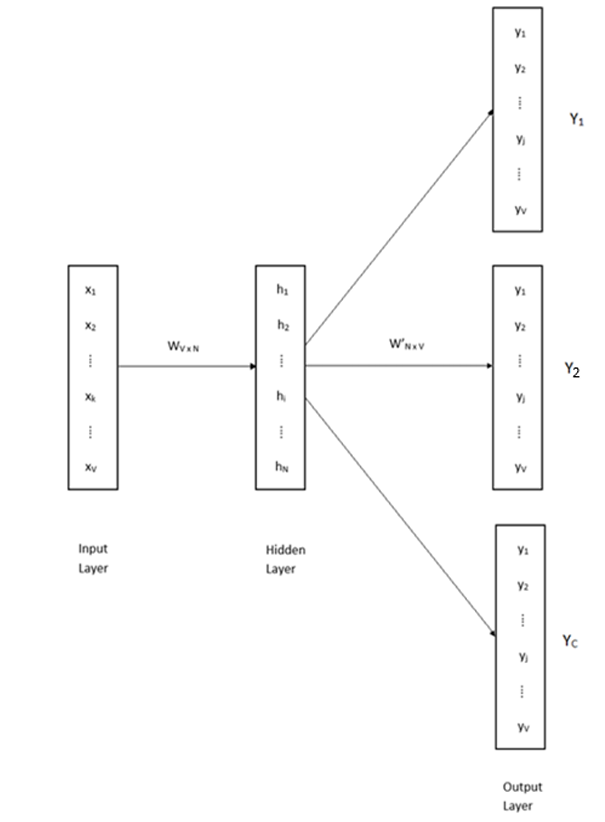

Similar to what we saw in CBOW, in the Forward propagation section, first
 we multiply our input  with the input $z_j$to hidden layer weights $W$:
 $$h=XW^T$$


  We can directly rewrite the preceding equation as:
  $$h=Zw_I$$
  Here, $h=Zw_I$  implies the vector representation for the input word  $w_1$.
Next, we compute $x_j$, which implies a similarity score between the word $j^{th}$
word in our vocabulary and the input target word. Similar to what we saw in
 the CBOW model, $x_j$ can be given as:
  $$ u_j = W'^T_{ij} . h$$
  We can directly rewrite the above equation as:
  $$ u_j = Z'_{w^T_j} . h$$
But, unlike the CBOW model where we just predicted the one target word,
 here we are predicting the $U$ number of context words. So, we can rewrite the
 above equation as:
 $$u_{c,j} =  Z'_{w^T_j}.h for c = 1,2,3....C$$

  And since we want to convert our scores to probabilities, we apply the
 softmax function and compute $y_{c,j}$ :

$$y_j = \frac{exp(u_j)}{\sum_{j' = 1}^{V} exp(u'_j)} ....(3)$$

Now, let us see how to compute the loss function. Let $û_{j|i}$ denote the
 probability of the correct context word. So, we need to maximize this
 probability:
 $$max y^*_{c,j}$$
  
  Instead of maximizing raw probabilities, maximize the log probabilities:
  $$max log(y^*_{c,j})$$
  
  Similar to what we saw in the CBOW model, we convert this into the
 minimization objective function by adding the negative sign:
  $$min- log(y^*_{c,j})$$
   Substituting equation (8) in the preceding equation, we can write the
 following:

$$L= -log\frac{exp(u_{c,j*})}{\sum_{j' = 1}^{V} exp(u_{j'})}$$

 Since we have $U$  context words, we take the product sum of the probabilities as:

 $$L= -log \prod_{c=1}^{c} f(x)\frac{exp(u_{c,j*})}{\sum_{j' = 1}^{V} exp(u_{j'})} $$

  So, according to logarithm rules, we can rewrite the above equation and our
 final loss function becomes:

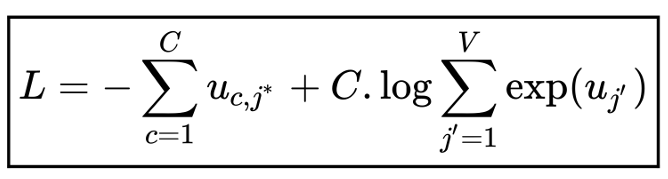

 Look at the loss function of the CBOW and skip-gram models. You'll notice
 that the only difference between the CBOW loss function and skip-gram loss
 function is the addition of the context word $U$.

# Backward Propagation
 We minimize the loss function using the gradient descent algorithm. So, we
 backpropagate the network, calculate the gradient of the loss function with
 respect to weights, and update the weights according to the weight update
 rule.
  First, we compute the gradient of loss with respect to hidden to output layer
. We cannot calculate the derivative of loss with respect to $W'$ directly
 from  as it has no  term in it, so we apply the chain rule as shown below.
 It is basically the same as what we saw in the CBOW model, except that here
 we sum over all the context words:
 $$\frac{δL}{δW'_{ij}} = \sum_{c = 1}^{C}\frac{δL}{δu_{c,j}}.\frac{δu_{c,j}}{δW'_{ij}} $$

 First, let's compute the first term:

$$\frac{δL}{δu_j} = e_{c,j}$$

 We know that $w_{ij}$ is the error term, which is the difference between the
 actual word and the predicted word. For notation simplicity, we can write
 this sum over all the context words as:

$$EI_J = \sum_{c=1}^Ce_{c,j}$$

So, we can say that:
$$\frac{δL}{δu_j} = EI_J$$

 Now, let's compute the second term. Since we know $u_j = W'^T_{ij} . h$, we can
write:

$$\frac{\delta u_j}{\delta W'_{ij}} = h$$

 Thus, the gradient of loss L with respect to $W'$ is given as follows:

$$\frac{\delta L}{\delta W'_{ij}} = EI_j.h$$

Now, we compute the gradient of loss with respect to the input to hidden
 layer weight $W$. It is simple and exactly same as we saw in the CBOW
 model:

 $$\frac{δL}{\delta W_{ki}} = \frac{δL}{\delta h_i}\frac{δh_i}{\delta W_{ki}}$$

  Thus, the gradient of loss $L$ with respect to $W$ is given as:
   $$\frac{δL}{\delta W_{ki}} = LH^T.X$$

  After computing the gradients, we update our weights W and W' as:

  $$W' = W' - \alpha EI_j.h$$
  $$W = W - \alpha LH^T.X$$

  Thus, while training the network, we update the weights of our network using
 the preceding equation and obtain optimal weights. The optimal weight
 between the input to hidden layer, $W$ becomes the vector representation for
 the words in our vocabulary.


# Various training strategies
 Now, we will look at different training strategies which can optimize and
 increase the efficiency of our word2vec model.

## Hierarchical softmax
In both the CBOW and skip-gram models, we used the softmax function for
 computing the probability of the occurrence of a word. But computing the
 probability using the softmax function is computationally expensive. Say, we
 are building a CBOW model; we compute the probability of the $j^{th}$
our vocabulary to be the target word as:

$$y_j = \frac{exp(u_j)}{\sum_{j' = 1}^V exp(u'_j)}$$

 If you look at the preceding equation, we are basically driving the exponent of
 the $x_j$ with the exponent of all the words $u'_j$ in the vocabulary. Our
 complexity would be $O(V)$, where $U$ is the vocabulary size. When we train the
 word2vec model with a vocabulary comprising millions of words, it is
 definitely going to be computationally expensive. So, to combat this problem,
 instead of using the softmax function, we use the hierarchical softmax function.

The hierarchical softmax function uses a Huffman binary search tree and
 significantly reduces the complexity to $𝛰(log_2(V))$. As shown in the following
 diagram, in hierarchical softmax, we replace the output layer with a binary
 search tree:


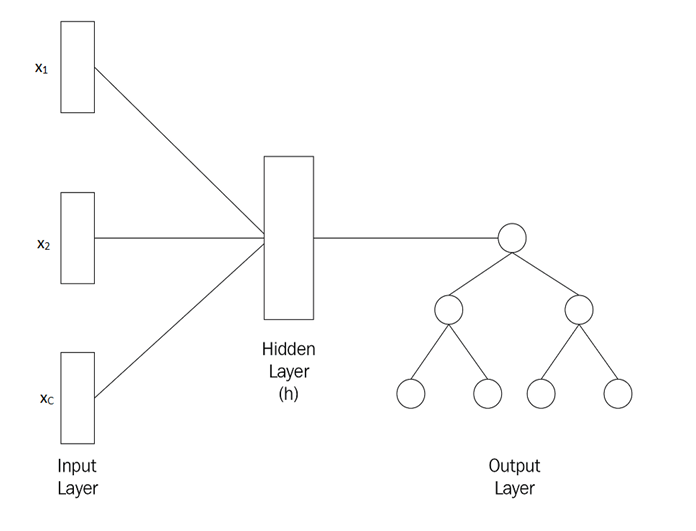

Each leaf node in the tree represents a word in the vocabulary and all the
 intermediate nodes represent the relative probability of their child node.
 How do we compute the probability of a target word given a context word?
 We simply traverse the tree by making a decision whether to turn left or right.
 As shown in the following figure, the probability of the word *flew* to be the
 target word, given some context word $ϵ$, is computed as a product of the
 probabilities along the path:

 $$p(flew|c) = p_{n_o}(left|c)*p_{n_1}(right|c)$$
 $$h_m = tamh(Ux_m + Wh_{m-1})$$


 The probability of the target word is shown as follows:

 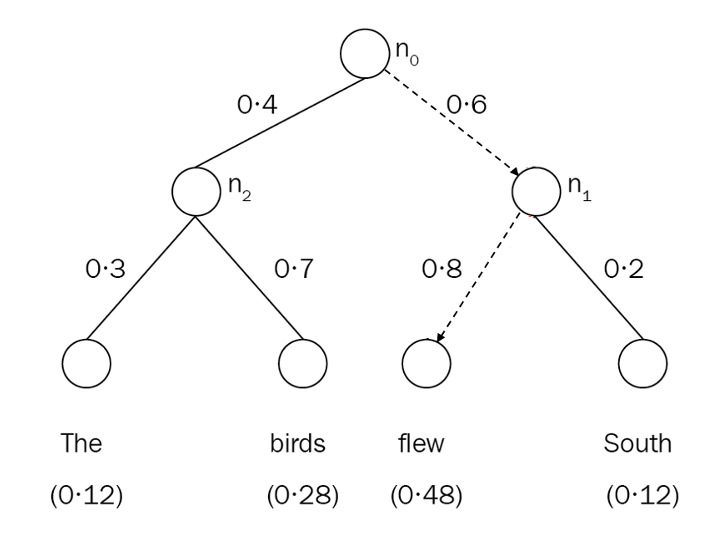

 To compute the probability for a node, we
 multiply the node's embedding $\beta_1$ with hidden layer value $h$ and apply a
 sigmoid function. For instance, the probability of a node $x$ to take a right,
 given a context word $\epsilon$, is computed as:

 $$z_t = σ(U_zx_t + W_zh_{t-1})$$

  Once we computed the probability of taking right, we can easily compute the
 probability of taking left by simply subtracting the probability of taking right
 from 1:
 $$h_t = tanh(Ux_t + Wh_{t-1} +bh)$$

  If we sum the probability of all the leaf nodes, then it equals to 1, meaning that
 our tree is already normalized, and to find a probability of a word, we need to
 evaluate only $log_2$ nodes.


## Negative sampling
 Consider the case where we have
 millions of words in the vocabulary. In that case, we need to perform
 numerous weight updates until the network predict the correct target word. It
 is time-consuming and also not an efficient method. So, instead of doing this,
 we mark the correct target word as a positive class and sample a few words
 from the vocabulary and mark it as a negative class.

  What we are essentially doing here is that we are converting our multinomial
 class problem to a binary classification problem (that is, instead of trying to
 predict the target word, the model classifies whether the given word is target
 word or not).

 The probability that the word is chosen as a negative sample is given as:

$$p(w_i) = \frac{frequency(w_i)^{3/4}}{\sum^n_{j=0} frequency(w_i)^{3/4}}$$

## Subsampling frequent words

 In our corpus, there will be certain words that occur very frequently, such as
 the, is, and so on, and there are certain words that occur infrequently. To
 maintain a balance between these two, we use a subsampling technique. So,
 we remove the words that occur frequently more than a certain threshold with
 the probability $p$, and it can be represented as:

$$\frac{\delta L}{\delta W_r} = \sum ^{T-1}_{j=0} \frac{\delta L_j}{\delta r_j} \frac{\delta r_j}{\delta W_r}$$

 Here, $t$ is the threshold and  is the frequency of the word $i$.


# Building the word2vec model using gensim

 Now that we have understood how the word2vec model works, let's see how
 to build the word2vec model using the gensim library. *Gensim* is one of the
 popular scientific software packages widely used for building vector space
 models. It can be installed via pip. So, we can just type the following
 command in the terminal to install the gensim library:

In [ ]:
 pip install -U gensim


In [ ]:
# First, we will import the necessary libraries:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data processing imports
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords
nltk.download('stopwords')
stopWords = stopwords.words('english')

# Modeling imports
from gensim.models import Word2Vec
from gensim.models import Phrases
from gensim.models.phrases import Phraser


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Loading the dataset
 Load the dataset:


In [ ]:
# !mkdir -p data
# !wget https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/raw/refs/heads/master/Chapter07/data/text.zip -O data/text.zip
# !unzip -n data/text.zip -d data
# !rm data/text.zip

In [ ]:
data = pd.read_csv('/content/text.csv',header=None)
data.head()

,0
0,room kind clean strong smell dogs. generally a...
1,stayed crown plaza april april . staff friendl...
2,booked hotel hotwire lowest price could find. ...
3,stayed husband sons way alaska cruise. loved h...
4,girlfriends stayed celebrate th birthdays. pla...


In [ ]:
def pre_process(text):

    #convert to lowercase
    text = str(text).lower()

    #remove all special characters and keep only alpha numeric characters and spaces
    text = re.sub(r'[^A-Za-z0-9\s.]',r'',text)

    #remove new lines
    text = re.sub(r'\n',r' ',text)

    # remove stop words
    text = " ".join([word for word in text.split() if word not in stopWords])

    return text

In [ ]:
pre_process(data[0][0])

'room kind clean strong smell dogs. generally average ok overnight stay youre fussy. would consider staying price right. breakfast free better nothing.'

In [ ]:
data[0] = data[0].map(lambda x: pre_process(x))

data[0].head()

,0
0,room kind clean strong smell dogs. generally a...
1,stayed crown plaza april april . staff friendl...
2,booked hotel hotwire lowest price could find. ...
3,stayed husband sons way alaska cruise. loved h...
4,girlfriends stayed celebrate th birthdays. pla...


In [ ]:
data[0][1].split(".")[:5]

['stayed crown plaza april april ',
 ' staff friendly attentive',
 ' elevators tiny ',
 ' food restaurant delicious priced little high side',
 ' course washington dc']

In [ ]:
corpus = []
for line in data[0][1].split('.'):
    words = [x for x in line.split()]
    corpus.append(words)

In [ ]:
corpus[:3]

[['stayed', 'crown', 'plaza', 'april', 'april'],
 ['staff', 'friendly', 'attentive'],
 ['elevators', 'tiny']]

In [ ]:
data = data[0].map(lambda x: x.split('.'))

corpus = []
for i in (range(len(data))):
    for line in data[i]:
        words = [x for x in line.split()]
        corpus.append(words)

corpus[:2]

[['room', 'kind', 'clean', 'strong', 'smell', 'dogs'],
 ['generally', 'average', 'ok', 'overnight', 'stay', 'youre', 'fussy']]

In [ ]:
phrases = Phrases(sentences=corpus,min_count=25,threshold=50)
bigram = Phraser(phrases)

In [ ]:
for index,sentence in enumerate(corpus):
    corpus[index] = bigram[sentence]

In [ ]:
corpus[111]

['connected', 'rivercenter', 'mall', 'downtown', 'san_antonio']

In [ ]:
corpus[9]

['course', 'washington_dc']

In [ ]:
#defining hyperparametrs
size = 100
window_size = 2
epochs = 100
min_count = 2
workers = 4
sg = 1

In [ ]:
#function call to word2vec model with the hyperparameters
model = Word2Vec(corpus, sg=1, window=window_size, vector_size=size, min_count=min_count, workers=workers, epochs=epochs)


In [ ]:
#saving the word2vec model
model.save('/content/word2vec.model')

In [ ]:
#loading the model
model = Word2Vec.load('/content/word2vec.model')

In [ ]:
#finding the similar words
model.wv.most_similar('san_diego')

[('denver', 0.7211458683013916),
 ('phoenix', 0.7045425176620483),
 ('seattle', 0.6939530968666077),
 ('la', 0.6798051595687866),
 ('boston', 0.67634516954422),
 ('chicago', 0.6670239567756653),
 ('san_antonio', 0.6653321385383606),
 ('san_francisco', 0.657813310623169),
 ('los_angeles', 0.6555231213569641),
 ('houston', 0.64862060546875)]

In [ ]:
#similar words with mathematics calculation
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.6613717675209045)]

In [ ]:
#unmatching text
text = ['los_angeles','indianapolis', 'holiday', 'san_antonio','new_york']

model.wv.doesnt_match(text)

'holiday'

# Visualizing Word Embeddings in TensorBoard

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')


import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.compat.v1.disable_eager_execution()

tf.compat.v1.reset_default_graph() # if ran from top without restarting the kernel
from tensorboard.plugins import projector
import numpy as np
import gensim
import os

In [ ]:
max_size = len(model.wv.key_to_index) - 1  # Use key_to_index for vocabulary size


In [ ]:
w2v = np.zeros((max_size,model.layer1_size))

In [ ]:
# Ensure the directory exists
if not os.path.exists('/content/projections'):
    os.makedirs('/content/projections')

w2v = {}  # Initialize the dictionary to store embeddings

# Iterate through the words in the model and store embeddings
with open("/content/projections/metadata.tsv", 'w+') as file_metadata:
    for i, word in enumerate(model.wv.index_to_key[:max_size]):  # Use index_to_key
        # Store the embeddings of the word
        w2v[i] = model.wv[word]

        # Write the word to a file (metadata for visualization in TensorBoard)
        file_metadata.write(word + '\n')

# Convert w2v dictionary to a NumPy array
w2v_array = np.array([w2v[i] for i in sorted(w2v.keys())])

In [ ]:
sess = tf.compat.v1.InteractiveSession()

In [ ]:
with tf.compat.v1.device("/cpu:0"):
    embedding = tf.compat.v1.Variable(w2v_array, trainable=False, name='embedding')

In [ ]:
tf.compat.v1.global_variables_initializer().run()

In [ ]:
saver = tf.compat.v1.train.Saver()

In [ ]:
writer = tf.compat.v1.summary.FileWriter('projections', sess.graph)

In [ ]:
config = projector.ProjectorConfig()
embed= config.embeddings.add()

In [ ]:
embed.tensor_name = 'embedding'
embed.metadata_path = 'metadata.tsv'

In [ ]:
projector.visualize_embeddings(writer, config)

saver.save(sess, 'projections/model.ckpt', global_step=max_size)

'projections/model.ckpt-19910'

# Finding Document Similarity

In [ ]:
news_dataset="news_dataset"
import warnings
warnings.filterwarnings('ignore')

import os
import gensim
from gensim.models.doc2vec import TaggedDocument
import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer(r'\w+')
# Download NLTK stopwords
nltk.download('stopwords')
stopWords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!mkdir -p data
!wget https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/raw/refs/heads/master/Chapter07/data/news_dataset.zip -O data/news_dataset.zip
!unzip -n data/news_dataset.zip -d data
!rm data/news_dataset.zip 1&2 > /dev/null 2>&1

--2024-12-15 15:16:54--  https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/raw/refs/heads/master/Chapter07/data/news_dataset.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/refs/heads/master/Chapter07/data/news_dataset.zip [following]
--2024-12-15 15:16:55--  https://raw.githubusercontent.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/refs/heads/master/Chapter07/data/news_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5368360 (5.1M) [application/zip]
Saving to: ‘data/n

In [ ]:
docLabels = []
docLabels = [f for f in os.listdir('./data/news_dataset') if f.endswith('.txt')]
data = []

for doc in docLabels:
    with open(f'data/news_dataset/{doc}', 'r', encoding='utf-8', errors='replace') as file:
        data.append(file.read())

In [ ]:
docLabels[:5]

['Politics_678.txt',
 'Science_838.txt',
 'Politics_70.txt',
 'Politics_725.txt',
 'Science_239.txt']

In [ ]:
data[0]

'Xref: cantaloupe.srv.cs.cmu.edu misc.legal:59961 alt.activism:42375 alt.conspiracy:21376 talk.politics.misc:176871 alt.society.sovereign:178\nPath: cantaloupe.srv.cs.cmu.edu!rochester!news.bbn.com!noc.near.net!uunet!olivea!sgigate!sgiblab!slxinc!jim\nFrom: jim@specialix.com (Jim Maurer)\nNewsgroups: misc.legal,alt.activism,alt.conspiracy,talk.politics.misc,alt.society.sovereign\nSubject: Re: $50,000 Reward!\nMessage-ID: <C513xD.22w@specialix.com>\nDate: 5 Apr 93 21:05:36 GMT\nReferences: <1993Apr3.030433.15392@colorado.edu> <C4y0J6.HB3@specialix.com> <1993Apr4.104122.11197@colorado.edu> <1993Apr4.105514.11664@colorado.edu>\nOrganization: Specialix Inc.\nLines: 10\n\najteel@dendrite.cs.Colorado.EDU (A.J. Teel) writes:\n\n>\tIf you are a "United States\' Citizen" and a "resident" of the\n>state, then your citizenship is in D.C. and thus are a 14th Amendment\n>Citizen. Are you a Citizen of the State in which you live? If you are\n>a "resident" then you *are not*.\n\nSo the only people wh

In [ ]:
class DocIterator(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list

    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            yield TaggedDocument(words=doc.split(), tags=[self.labels_list[idx]])

In [ ]:
#initializiting the document iterator object
it = DocIterator(data, docLabels)

In [ ]:
#defining hyperparameters
size = 100
alpha = 0.025
min_alpha = 0.025
dm = 1
min_count = 1

In [ ]:
#defining the doc2vec model
model = gensim.models.Doc2Vec(vector_size=size, min_count=min_count, alpha=alpha, min_alpha=min_alpha, dm=dm)
model.build_vocab(it)

In [ ]:
#training the model for 100 epochs
for epoch in range(100):
    model.train(it,total_examples=120,epochs = model.epochs)
    model.alpha -= 0.002
    model.min_alpha = model.alpha

In [ ]:
#saving the model
model.save('doc2vec.model')

In [ ]:
#loading the saved model
d2v_model = gensim.models.doc2vec.Doc2Vec.load('doc2vec.model')

In [ ]:
#fnding the similar documents
d2v_model.docvecs.most_similar('Electronics_724.txt')

[('Electronics_544.txt', 0.7236936688423157),
 ('Electronics_777.txt', 0.7204186916351318),
 ('Electronics_118.txt', 0.7036520838737488),
 ('Electronics_426.txt', 0.7030108571052551),
 ('Politics_256.txt', 0.6982777714729309),
 ('Politics_759.txt', 0.6942397356033325),
 ('Sports_152.txt', 0.6898590922355652),
 ('Sports_176.txt', 0.6890406608581543),
 ('Politics_676.txt', 0.688625693321228),
 ('Politics_0.txt', 0.6870641112327576)]

# Continuous bag of words model

In [ ]:
import tensorflow as tf
import numpy as np
from functools import reduce

from tqdm.notebook import tqdm

In [ ]:
sentences=["the sun rises in the east",]
vocabulary=set()
def add_to_vocab(existing_vocab,new_sentence):
    words=new_sentence.lower().split()
    existing_vocab.update(words)

    return existing_vocab

vocabulary=list(reduce(add_to_vocab,sentences,vocabulary))
vocabulary=sorted(vocabulary)
vocabulary

['east', 'in', 'rises', 'sun', 'the']

In [ ]:
input_output:list[tuple[str,str]]=[]
for sentence in sentences:
    words=sentence.split()
    length_of_words=len(words)
    for i,word in enumerate(words):
        input_output.append((word.lower(),words[i+1].lower()))
        if i==length_of_words-2:
            break
print(input_output)

[('the', 'sun'), ('sun', 'rises'), ('rises', 'in'), ('in', 'the'), ('the', 'east')]


In [ ]:
def one_hot_encode(word,vocabulary):
    vocab_size=len(vocabulary)
    encoded_word=np.zeros(shape=(vocab_size,))
    encoded_word[vocabulary.index(word.lower())]=1
    return encoded_word

def decoded_word(encoded_word,vocabulary):
    return vocabulary[np.argmax(encoded_word)]

encoded_input_output=[]
for input,output in input_output:
    encoded_input_output.append((one_hot_encode(input, vocabulary), one_hot_encode(output, vocabulary)))

encoded_input_output


[(array([0., 0., 0., 0., 1.]), array([0., 0., 0., 1., 0.])),
 (array([0., 0., 0., 1., 0.]), array([0., 0., 1., 0., 0.])),
 (array([0., 0., 1., 0., 0.]), array([0., 1., 0., 0., 0.])),
 (array([0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 1.])),
 (array([0., 0., 0., 0., 1.]), array([1., 0., 0., 0., 0.]))]

In [ ]:
# parameters
vocab_size = len(vocabulary)
hidden_size = 10

W1 = np.random.randn(vocab_size, hidden_size)
W2 = np.random.randn(hidden_size, vocab_size)


In [ ]:
def softmax(x):
    sum_exp = sum([np.exp(_x) for _x in x])
    return np.exp(x)/sum_exp

In [ ]:
def Single_context_CBOW(x, label, W1, W2, loss: list[float], lr=1e-1):
    # print(W1,W2)
    # print(x)
    # print("-------------------------------------------")
    # print(label)
    # print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    #forward propagation
    h = np.dot(W1.T, x) # (hidden_size,)
    u = np.dot(W2.T, h) # (vocab_size,)
    print(h)
    print("-------------------------------------------")
    print(u)
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    #softmax layer
    y_pred = softmax(u) # (vocab_size,)

    #error
    e = -label + y_pred # (vocab_size,)
    #backward propagation
    dW2 = np.outer(h, e)
    dW1 = np.outer(x, np.dot(W2, e))

    #update weights
    W1 = W1 - lr * dW1
    W2 = W2 - lr * dW2
    #loss function
    loss.append(-float(u[label == 1]) + np.log(np.sum(np.exp(u))))

    return W1, W2, loss

In [ ]:
loss = []
n_epochs = 10

average_loss_per_epoch = []
for epoch in tqdm(range(n_epochs)):
    loss_per_epoch = []
    for enc_input, enc_output in encoded_input_output:
        W1, W2, loss_per_epoch = Single_context_CBOW(enc_input, enc_output, W1, W2, loss_per_epoch)
    average_loss_per_epoch.append(np.average(loss_per_epoch))
    loss.extend(loss_per_epoch)


  0%|          | 0/10 [00:00<?, ?it/s]

[ 0.89801919  1.15021768  0.87651451  1.67921391 -1.19955495  0.15052173
 -0.62762093  1.59250264  0.2464608  -2.0513096 ]
-------------------------------------------
[0.76379052 5.63112547 0.95639451 3.76692475 1.92113337]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[ 0.60619656 -0.15985162  0.82970813 -1.92420084 -0.1899871  -1.36389533
 -0.89424387  0.92975178 -0.37749593  0.04829594]
-------------------------------------------
[-0.28933113 -3.26606477 -1.12065901 -4.41250707 -1.73387638]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[ 1.38593186  0.86031477 -0.68528124  0.37714537  0.71446623 -0.63359488
 -0.5785632   0.359349   -0.94860954 -1.7562235 ]
-------------------------------------------
[-5.95133356  3.81040568 -0.85912614  1.50055823  5.5431683 ]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[ 0.1124314   2.22759563  0.49832777 -0.23045864  0.71715612 -0.47779622
 -0.13018316 -2.33627429  0.84337858 -0.91529678]
------------------------

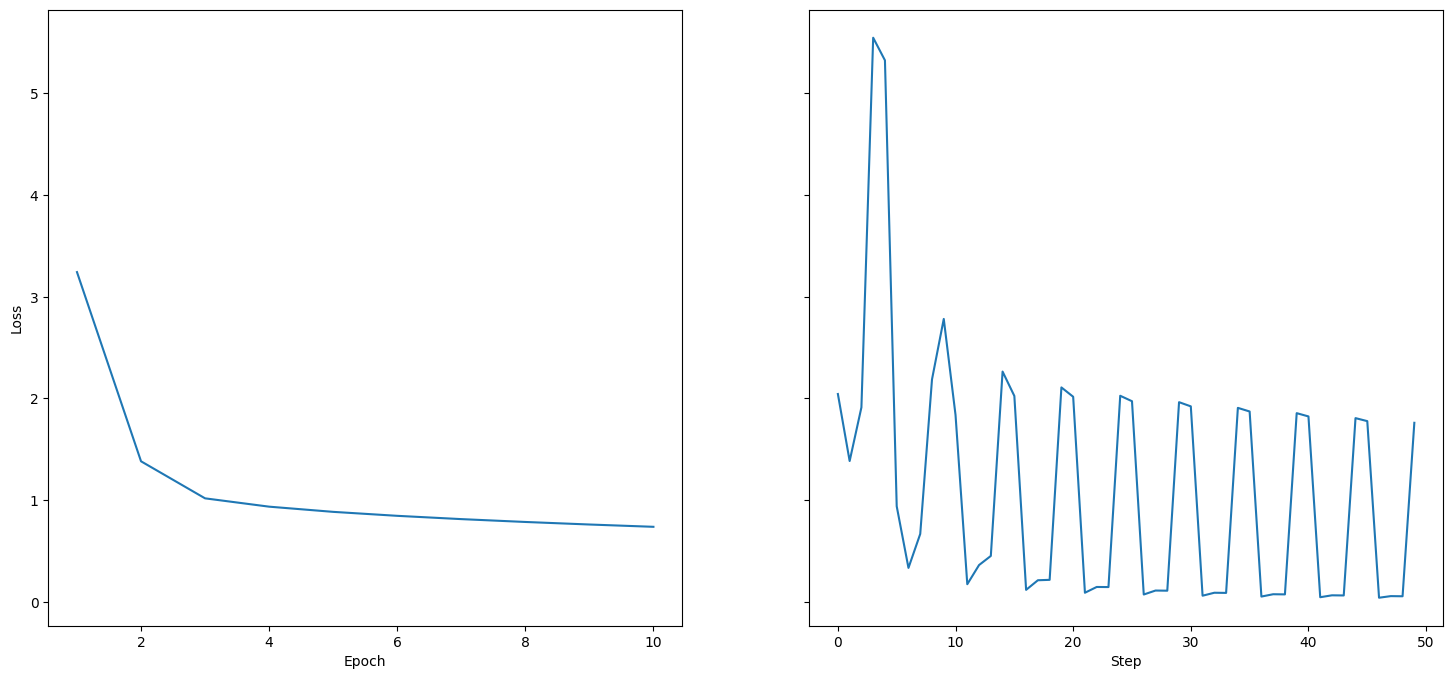

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
ax1.plot([int(i+1) for i in range(n_epochs)], average_loss_per_epoch)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")

ax2.plot(loss)
ax2.set_xlabel("Step")


plt.show()